### Do-Calculus

In this section, we will see how to check the applicability of the three rules of different graphs and expressions.

### Theorem 4.3.1 — Do-Calculus.

Let $\mathcal{G}$ be a causal diagram and $\mathbb{P}_{\star}$ the collection of all interventional $(\mathcal{L}_2)$ distributions compatible with $\mathcal{G}$. For any disjoint sets $X,Y,Z,W \subseteq V$, the following three rules are valid:

#### Rule 1:
$$P(y \mid do(x), z, w) = P(y \mid do(x), w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{X}}.$$

#### Rule 2: 
$$P(y \mid do(x), do(z), w) = P(y \mid do(x), z, w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{X}\underline{Z}}.$$

#### Rule 3:  
$$P(y \mid do(x), do(z), w) = P(y \mid do(x), w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{XZ(W)}}.$$

where a graph $\mathcal{G}_{XZ}$ is obtained from $\mathcal{G}$ by removing the arrows incoming to $X$ and outgoing from $Z$, and $Z(W)$ is the set of $Z$-nodes non-ancestors of $W$ in the corresponding graph.

<a target="_blank" href="https://colab.research.google.com/github/CausalAILab/causalai-book/blob/main/ch4 (part 2).ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import sys

if 'google.colab' in sys.modules:
    os.system("git clone https://github.com/CausalAILab/causalai-book.git")
    os.system("mv causalai-book/* ./")
    os.system("rm -rf causalai-book")

In [2]:
# Install libraries
# !pip install toposort
# !pip install pydash

In [3]:
from src.fusion import *
from src.utils import *

from src.inference.classes.causal_query import CausalQuery
from src.graph_analysis.do_calculus.classes.do_calculus_inspection_query import DoCalculusInspectionQuery

from src.graph_analysis.do_calculus.do_calculus_inspector import DoCalculusInspector

from src.graph_analysis.classes.probability_expression import ProbabilityExpression
from src.inference.utils.expression_utils import ExpressionUtils as eu

In [4]:
from src.inference.engines.do_calculus_engine import DoCalculusEngine

from IPython.display import display, Latex

#### Rule 1:
$$P(y \mid do(x), z, w) = P(y \mid do(x), w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{X}}.$$

In [5]:
G1 = '''
<NODES>
X
Y
Z

<EDGES>
Z -> X
X -> Y
X -- Y
'''

In [6]:
G1 = parseGraph(G1)

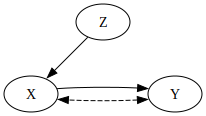

In [7]:
plot_causal_diagram(G1, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [8]:
X = gu.getNodesByName(['X'], G1)
Y = gu.getNodesByName(['Y'], G1)
Z = gu.getNodesByName(['Z'], G1)

In [9]:
# Probability expression takes 4 arguments: X, Y, Z, W with the same interpretations as presented in the rules of do-calculus

P = ProbabilityExpression(X = X, Y = Y, Z = Z)

In [10]:
rule = 1

In [11]:
query = DoCalculusInspectionQuery()
query.rule = rule
query.P = P

In [12]:
inspector = DoCalculusInspector()
result, transformedGraph = inspector.test(query, G1, return_graph=True)

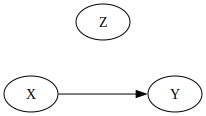

In [13]:
plot_causal_diagram(transformedGraph, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [14]:
display_inspector_result(result)

Applicable: True
Expression: P\left(Y \middle| do(X), Z\right)
Evaluation: \left(Y \perp Z | X\right)_{G_{\overline{X}}}
Result: P\left(Y \middle| do(X), Z\right) = P\left(Y \middle| do(X)\right)


In [15]:
display_inspector_result(result, latex=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Rule 2: 
$$P(y \mid do(x), do(z), w) = P(y \mid do(x), z, w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{X}\underline{Z}}.$$


In [16]:
G2 = '''
<NODES>
X
Y
Z

<EDGES>
Z -> X
Z -> Y
Y -> X
'''

In [17]:
G2 = parseGraph(G2)

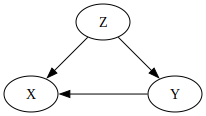

In [18]:
plot_causal_diagram(G2, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [19]:
X = gu.getNodesByName(['X'], G2)
Y = gu.getNodesByName(['Y'], G2)
Z = gu.getNodesByName(['Z'], G2)

In [20]:
# Probability expression takes 4 arguments: X, Y, Z, W with the same interpretations as presented in the rules of do-calculus

P = ProbabilityExpression(Y = Y, Z = X, W = Z)

In [21]:
query = DoCalculusInspectionQuery()
query.rule = 2
query.P = P

In [22]:
inspector = DoCalculusInspector()
result, trasnformedGraph = inspector.test(query, G2, return_graph=True)

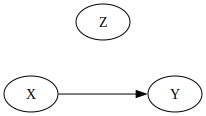

In [23]:
plot_causal_diagram(transformedGraph, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [24]:
display_inspector_result(result, latex=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Rule 3:  
$$P(y \mid do(x), do(z), w) = P(y \mid do(x), w) \quad \text{if } (Y \perp Z \mid X, W) \text{ in } \mathcal{G}_{\overline{XZ(W)}}.$$

In [25]:
G3 = '''
<NODES>
X
Y
Z

<EDGES>
Z -> X
X -> Y
Z -- Y
X -- Y
'''

In [26]:
G3 = parseGraph(G3)

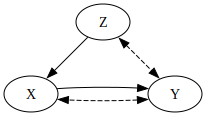

In [27]:
plot_causal_diagram(G3, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [28]:
X = gu.getNodesByName(['X'], G3)
Y = gu.getNodesByName(['Y'], G3)
Z = gu.getNodesByName(['Z'], G3)

In [29]:
P = ProbabilityExpression(Y = Z, Z = X)

In [30]:
query = DoCalculusInspectionQuery()
query.rule = 3
query.P = P

In [31]:
inspector = DoCalculusInspector()
result, transformedGraph = inspector.test(query, G3, return_graph=True)

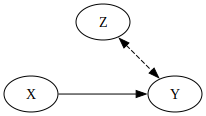

In [32]:
plot_causal_diagram(transformedGraph, node_positions={'X': (0, 0), 'Y': (2, 0), 'Z': (1, 1)})

In [33]:
display_inspector_result(result, latex=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### ID Expressions with Do-Calculus 

In [34]:
G4 = '''
<NODES>
X
Y
Z1
Z2

<EDGES>
X -> Z1
Z1 -> Y
Z2 -> Y
X -- Z2
Z1 -- Z2
'''

In [35]:
G4 = parseGraph(G4)

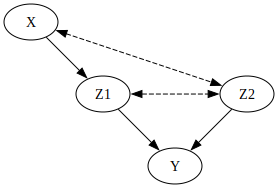

In [36]:
plot_causal_diagram(G4, node_positions={'X': (-1, 1), 'Y': (1, -1), 'Z1': (0, 0), 'Z2': (2, 0)})

In [37]:
X = gu.getNodesByName(['X'], G4)
Y = gu.getNodesByName(['Y'], G4)
Z = gu.getNodesByName(['Z2'], G4)
XZ = gu.getNodesByName(['X', 'Z2'], G4)

In [38]:
query1 = CausalQuery(X, Y, Z)
query2 = CausalQuery(XZ, Y)

In [39]:
engine = DoCalculusEngine()

In [40]:
result1 = engine.compute(query1, G4)
exp1 = eu.write(result1)

In [41]:
display(Latex(f'${exp1}$'))

<IPython.core.display.Latex object>

In [42]:
result2 = engine.compute(query2, G4)
exp2 = eu.write(result2)

In [43]:
display(Latex(f'${exp2}$'))

<IPython.core.display.Latex object>

#### ID Expression for Napkin Graph

In [44]:
G5 = '''
<NODES>
W
Z
X
Y

<EDGES>
W -> Z
Z -> X
X -> Y
W -- X
W -- Y
'''

In [45]:
G5 = parseGraph(G5)

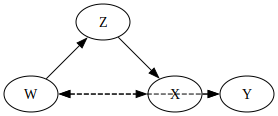

In [46]:
plot_causal_diagram(G5, node_positions={'W': (0, 0), 'Z': (1, 1), 'X': (2, 0), 'Y': (3, 0)})

In [47]:
X = gu.getNodesByName(['X'], G5)
Y = gu.getNodesByName(['Y'], G5)

In [48]:
q = CausalQuery(X, Y)

In [49]:
engine = DoCalculusEngine()

In [50]:
result = engine.compute(q, G5)

In [51]:
exp = eu.write(result)
print(exp)

\frac{\sum_{W}{P\left(X,Y \middle| W,Z\right)P\left(W\right)}}{\sum_{W}{P\left(X \middle| W,Z\right)P\left(W\right)}}


In [52]:
display(Latex(f'${exp}$'))

<IPython.core.display.Latex object>

In [53]:
do_calculus_derivation(engine.trace)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>